# BTS Mental Art
## Most cells from ITU DATA MINING

In [1]:
import pandas as pd
import numpy as np
import re # to remove the unwanted characters from columns
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Another visualization library example(interactive): Plotly

In [16]:
review = {
    "user_id": ["U1", "U2", "U3", "U4"],
    "item_id": ["I5", "I2", "I1", "I1"],
    "rating": [5, 1, 4, 5],
    "review_text": ["The best product ever", "Too expensive", "Like it", "Yey"],
    "email": ["U1@gmail.com", "U2@gmail.com", "U3@gmail.com", "U4@gmail.com"]
}
df_review = pd.DataFrame(review)

In [17]:
df_review

,user_id,item_id,rating,review_text,email
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com
2,U3,I1,4,Like it,U3@gmail.com
3,U4,I1,5,Yey,U4@gmail.com


In [4]:
df = pd.read_csv("./credit_score.csv")

/Users/resultugay/Desktop/iaml/week2/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Updating Rows and Columns: Modifying Data within DataFrames

we will use the filtering techniques we learned 

### 1. Updating Columns

In [10]:
df_review

,USER,ITEM,SCORE,TEXT,MAIL
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com
2,U3,I1,4,Like it,U3@gmail.com
3,U4,I1,5,Yey,U4@gmail.com


In [7]:
print(df_review.columns)
df_review.columns = ["user", "item", "score", "text", "mail"]
print(df_review.columns)

Index(['user_id', 'item_id', 'rating', 'review_text', 'email'], dtype='object')
Index(['user', 'item', 'score', 'text', 'mail'], dtype='object')


In [9]:
df_review.columns = [x.upper() for x in df_review.columns] #make uppercase all column names
print(df_review.columns)

Index(['USER', 'ITEM', 'SCORE', 'TEXT', 'MAIL'], dtype='object')


In [7]:
df_review.columns = [x.lower() for x in df_review.columns] #make uppercase all column names
print(df_review.columns)

Index(['user', 'item', 'score', 'text', 'mail'], dtype='object')


In [21]:
df_review

,user_id,item_id,rating,review_text,user_mail
0,U1,I5,5,The best product ever,U1@gmail.com
1,U2,I2,1,Too expensive,U2@gmail.com
2,U3,I1,4,Like it,U3@gmail.com
3,U4,I1,5,Yey,U4@gmail.com


In [20]:
#change only specific columns
df_review.rename(columns = {"email": "user_mail", "text": "review"}, inplace=True)
print(df_review.columns)

Index(['user_id', 'item_id', 'rating', 'review_text', 'user_mail'], dtype='object')


### 2. Updating Data

In [22]:
df_review.iloc[1]

user_id                   U2
item_id                   I2
rating                     1
review_text    Too expensive
user_mail       U2@gmail.com
Name: 1, dtype: object

In [27]:
df_review.iloc[1] = ["user2new", "I2", 1, "Too expensive", "user2new@gmail.com"]
df_review.iloc[1]

user_id                  user2new
item_id                        I2
rating                          1
review_text         Too expensive
user_mail      user2new@gmail.com
Name: 1, dtype: object

In [30]:
df_review

,user_id,item_id,rating,review_text,user_mail,user
0,U1,I5,5,The best product ever,U1@gmail.com,NaN
1,user2new,I2,1,Too expensive,U2@gmail.com,U2
2,U3,I1,4,Like it,U3@gmail.com,NaN
3,U4,I1,5,Yey,U4@gmail.com,NaN


In [29]:
df_review.loc[1, ["user_mail", "user"]] =   ["U2@gmail.com", "U2"]
df_review.iloc[1]

user_id             user2new
item_id                   I2
rating                     1
review_text    Too expensive
user_mail       U2@gmail.com
user                      U2
Name: 1, dtype: object

#### 2.1 Apply Method

In [32]:
df_review

,user_id,item_id,rating,review_text,user_mail,user
0,U1,I5,5,The best product ever,U1@gmail.com,NaN
1,user2new,I2,1,Too expensive,U2@gmail.com,U2
2,U3,I1,4,Like it,U3@gmail.com,NaN
3,U4,I1,5,Yey,U4@gmail.com,NaN


In [34]:
# find length of review column
df_review["review_text"].apply(len)

0    21
1    13
2     7
3     3
Name: review_text, dtype: int64

In [35]:
df_review

,user_id,item_id,rating,review_text,user_mail,user
0,U1,I5,5,The best product ever,U1@gmail.com,NaN
1,user2new,I2,1,Too expensive,U2@gmail.com,U2
2,U3,I1,4,Like it,U3@gmail.com,NaN
3,U4,I1,5,Yey,U4@gmail.com,NaN


In [36]:
# create a function and send it into apply function as argument
# 1. way: create function
def upper_case(val):
    return val.upper()

df_review["review_text"].apply(upper_case)

0    THE BEST PRODUCT EVER
1            TOO EXPENSIVE
2                  LIKE IT
3                      YEY
Name: review_text, dtype: object

In [38]:
# to make changes permanent, assign the result to our review column
df_review["review_text"] = df_review["review_text"].apply(upper_case)
df_review

,user_id,item_id,rating,review_text,user_mail,user
0,U1,I5,5,THE BEST PRODUCT EVER,U1@gmail.com,NaN
1,user2new,I2,1,TOO EXPENSIVE,U2@gmail.com,U2
2,U3,I1,4,LIKE IT,U3@gmail.com,NaN
3,U4,I1,5,YEY,U4@gmail.com,NaN


In [39]:
# or if your function is not complicated, you can write your function into your apply function

df_review["review_text"] = df_review["review_text"].apply(lambda x: x.lower())
df_review

,user_id,item_id,rating,review_text,user_mail,user
0,U1,I5,5,the best product ever,U1@gmail.com,NaN
1,user2new,I2,1,too expensive,U2@gmail.com,U2
2,U3,I1,4,like it,U3@gmail.com,NaN
3,U4,I1,5,yey,U4@gmail.com,NaN


In [16]:
# increase score by one and create a new column. 
# When youre dealing with specific columns and giving the name of column inside lambda function, you need to set axis as 1, it means you're working as column-wise.
df_review["score_plus_one"] = df_review.apply(lambda x: x["score"] + 1, axis=1)
# both rows return the same result. ıf you're giving the name of your column outside the apply method, yo don't have o set axis as 1
#df_review["score"].apply(lambda x: x + 1)
df_review

,user,item,score,review,user_mail,score_plus_one
0,U1,I5,5,the best product ever,U1@gmail.com,6
1,U2,I2,1,too expensive,U2@gmail.com,2
2,U3,I1,4,like it,U3@gmail.com,5
3,U4,I1,5,yey,U4@gmail.com,6


## Add & Remove Columns

In [17]:
df_review["score"].astype(str) + "-" + df_review["review"]

0    5-the best product ever
1            1-too expensive
2                  4-like it
3                      5-yey
dtype: object

In [18]:
# create a ne column by using score and review columns
df_review["score_review"] = df_review["score"].astype(str) + "_" + df_review["review"]
df_review

,user,item,score,review,user_mail,score_plus_one,score_review
0,U1,I5,5,the best product ever,U1@gmail.com,6,5_the best product ever
1,U2,I2,1,too expensive,U2@gmail.com,2,1_too expensive
2,U3,I1,4,like it,U3@gmail.com,5,4_like it
3,U4,I1,5,yey,U4@gmail.com,6,5_yey


In [19]:
# drop unnecessary columns
df_review.drop(columns=["score_plus_one"], inplace=True)
df_review

,user,item,score,review,user_mail,score_review
0,U1,I5,5,the best product ever,U1@gmail.com,5_the best product ever
1,U2,I2,1,too expensive,U2@gmail.com,1_too expensive
2,U3,I1,4,like it,U3@gmail.com,4_like it
3,U4,I1,5,yey,U4@gmail.com,5_yey


## Concat two Dataframes

In [42]:
df_new = {
    "user": ["U3", "U2"],
    "item": ["I4", "I1"],
    "score": [3, 2],
    "review": ["Good Product", "dont like it"],
    "user_mail": ["U3@gmail.com", "U2@gmail.com"]
}
df_new = pd.DataFrame(df_new)
df_new

,user,item,score,review,user_mail
0,U3,I4,3,Good Product,U3@gmail.com
1,U2,I1,2,dont like it,U2@gmail.com


In [43]:
df_review

,user_id,item_id,rating,review_text,user_mail,user
0,U1,I5,5,the best product ever,U1@gmail.com,NaN
1,user2new,I2,1,too expensive,U2@gmail.com,U2
2,U3,I1,4,like it,U3@gmail.com,NaN
3,U4,I1,5,yey,U4@gmail.com,NaN


In [44]:
df_temp = pd.concat([df_review, df_new])
df_temp

,user_id,item_id,rating,review_text,user_mail,user,item,score,review
0,U1,I5,5.0,the best product ever,U1@gmail.com,NaN,NaN,NaN,NaN
1,user2new,I2,1.0,too expensive,U2@gmail.com,U2,NaN,NaN,NaN
2,U3,I1,4.0,like it,U3@gmail.com,NaN,NaN,NaN,NaN
3,U4,I1,5.0,yey,U4@gmail.com,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,U3@gmail.com,U3,I4,3.0,Good Product
1,NaN,NaN,NaN,NaN,U2@gmail.com,U2,I1,2.0,dont like it


**NOTE**: if you want to concat dataframes side by side, SET AXIS=1
See that the below df has more than two rows with the same index. It could be a problem, while removing a row by index. That's why, set ignore_index=True, and pandas assign new index for your newly added rows.

In [45]:
df_review = pd.concat([df_review, df_new], ignore_index=True)
df_review

,user_id,item_id,rating,review_text,user_mail,user,item,score,review
0,U1,I5,5.0,the best product ever,U1@gmail.com,NaN,NaN,NaN,NaN
1,user2new,I2,1.0,too expensive,U2@gmail.com,U2,NaN,NaN,NaN
2,U3,I1,4.0,like it,U3@gmail.com,NaN,NaN,NaN,NaN
3,U4,I1,5.0,yey,U4@gmail.com,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,U3@gmail.com,U3,I4,3.0,Good Product
5,NaN,NaN,NaN,NaN,U2@gmail.com,U2,I1,2.0,dont like it


In [46]:
df_review.drop(index=5, inplace=True)

In [47]:
df_review

,user_id,item_id,rating,review_text,user_mail,user,item,score,review
0,U1,I5,5.0,the best product ever,U1@gmail.com,NaN,NaN,NaN,NaN
1,user2new,I2,1.0,too expensive,U2@gmail.com,U2,NaN,NaN,NaN
2,U3,I1,4.0,like it,U3@gmail.com,NaN,NaN,NaN,NaN
3,U4,I1,5.0,yey,U4@gmail.com,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,U3@gmail.com,U3,I4,3.0,Good Product


In [49]:
# drop rows by condition. First define condition, and then take the index of rows those satisfy the condition
cond = df_review["user"]=="U3"
cond
df_review.drop(index=df_review[cond].index)

,user_id,item_id,rating,review_text,user_mail,user,item,score,review
0,U1,I5,5.0,the best product ever,U1@gmail.com,NaN,NaN,NaN,NaN
1,user2new,I2,1.0,too expensive,U2@gmail.com,U2,NaN,NaN,NaN
2,U3,I1,4.0,like it,U3@gmail.com,NaN,NaN,NaN,NaN
3,U4,I1,5.0,yey,U4@gmail.com,NaN,NaN,NaN,NaN


## Sorting Data

In [25]:
df_review.sort_values(by="user")

,user,item,score,review,user_mail,score_review
0,U1,I5,5,the best product ever,U1@gmail.com,5_the best product ever
1,U2,I2,1,too expensive,U2@gmail.com,1_too expensive
2,U3,I1,4,like it,U3@gmail.com,4_like it
4,U3,I4,3,Good Product,U3@gmail.com,NaN
3,U4,I1,5,yey,U4@gmail.com,5_yey


In [50]:
df_review.sort_values(by="user", ascending=True)

,user_id,item_id,rating,review_text,user_mail,user,item,score,review
1,user2new,I2,1.0,too expensive,U2@gmail.com,U2,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,U3@gmail.com,U3,I4,3.0,Good Product
0,U1,I5,5.0,the best product ever,U1@gmail.com,NaN,NaN,NaN,NaN
2,U3,I1,4.0,like it,U3@gmail.com,NaN,NaN,NaN,NaN
3,U4,I1,5.0,yey,U4@gmail.com,NaN,NaN,NaN,NaN


In [51]:
df_review.sort_values(by=["user", "item"])

,user_id,item_id,rating,review_text,user_mail,user,item,score,review
1,user2new,I2,1.0,too expensive,U2@gmail.com,U2,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,U3@gmail.com,U3,I4,3.0,Good Product
0,U1,I5,5.0,the best product ever,U1@gmail.com,NaN,NaN,NaN,NaN
2,U3,I1,4.0,like it,U3@gmail.com,NaN,NaN,NaN,NaN
3,U4,I1,5.0,yey,U4@gmail.com,NaN,NaN,NaN,NaN


In [28]:
df_review.sort_values(by=["user", "item"], ascending= [True, False])

,user,item,score,review,user_mail,score_review
0,U1,I5,5,the best product ever,U1@gmail.com,5_the best product ever
1,U2,I2,1,too expensive,U2@gmail.com,1_too expensive
4,U3,I4,3,Good Product,U3@gmail.com,NaN
2,U3,I1,4,like it,U3@gmail.com,4_like it
3,U4,I1,5,yey,U4@gmail.com,5_yey


## Data Type Check

### Convert All Columns into their correct data type 
 *   Clean the columns, remove unwanted characters
 *   **ValueError: could not convert string to float (or int) in Python** occurs when we pass a string that cannot be converted to a float (empty string or one containing characters)
 *   pd.to_numeric() -> return dtypes float64 or int64 depending on the data supplied

In [29]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [55]:
object_to_float_columns = ["Annual_Income", "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]
object_to_int_columns = ["Age", "Num_of_Loan", "Num_of_Delayed_Payment"]
# r'[^0-9.-]' is a regular expression pattern that matches any character that is not a digit (0-9), a period (.), or a hyphen (-).
for col in (object_to_float_columns + object_to_int_columns):
    df[col] = df[col].apply(lambda x: re.sub(r'[^0-9.-]', '', str(x)))
    #errors="coerce" is an optional argument that specifies how to handle errors during the conversion. 
    #When errors is set to "coerce," any value that cannot be converted to a numeric type will be replaced with NaN (Not-a-Number).
    # coerce -> converts any value error to NaN
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [56]:
# check dtypes again
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

## Data Dropping
*   Drop Duplicates : duplicated rows don't give information to us
*   Drop Null-Target Rows : target value cannot be null, can yield a problem

In [57]:
# Check Duplicates using duplicated method
# If there are duplicated rows, remove one of them
# 1. way:
print("How many rows are duplicated ? ", df[df.duplicated()].shape[0])
# 2. way:
print("How many columns are duplicated ? ", df.duplicated().sum())

shape_before = df.shape[0]
# And remove if exist:
df = df.drop_duplicates(keep="first")
shape_after = df.shape[0]

# Check how many rows are deleted
print("Number of rows deleted: ", shape_before - shape_after)

How many columns are duplicated ?  0
How many columns are duplicated ?  0
Number of rows deleted:  0


In [33]:
df["Credit_Score"].isna().sum()
# There are no rows with target value is NaN. If exists, remove them.

0

## Outlier Detection and Handling
*   Go over each features and detect their outliers
*   Handle numeric and categorial features seperately
*   Use boxplot or histogram to see hte outlier values using visualization
*   Use Bar chart to see the outlier values using visualization


In [34]:
# Take the names of numeric columns, we use boxplot and hist for them
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_columns = df.select_dtypes(include=numerics).columns
numeric_columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

#### Age Column
* It is not expected to be older than 100 and younger than 1. 
* First check the data loss in the case of drop the rows.  
* If the number of dropped values can be discarded, Do **filtering**. otherwise try to use **Compressing**

In [35]:
print(((df['Age'] <= 90) & (df['Age'] >= 0)).value_counts())

True     97219
False     2781
Name: Age, dtype: int64


In [36]:
# Do Filtering. 
df = df[(df['Age'] <= 90) & (df['Age'] >= 0)]
df.shape

(97219, 28)

#### Num_Bank_Accounts Column

<AxesSubplot:xlabel='Num_Bank_Accounts'>

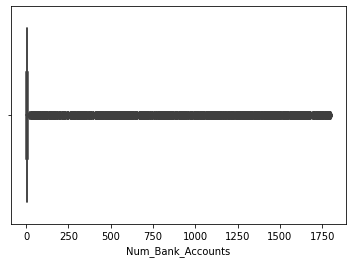

In [37]:
sns.boxplot(x=df["Num_Bank_Accounts"])

In [38]:
df["Num_Bank_Accounts"].describe()

count    97219.000000
mean        17.128658
std        117.690107
min         -1.000000
25%          3.000000
50%          6.000000
75%          7.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [39]:
#select threshold as 30 and see how mony rows will be dropped
df[df["Num_Bank_Accounts"] > 30].shape

(1274, 28)

In [40]:
df = df[df["Num_Bank_Accounts"] <= 30]

In [41]:
df.shape

(95945, 28)

### **TODO:** There are still some columns with outlier values. You can try to find and handle them. You can try to implement different outlier detection and handling techniques for practice.
<br>
<br>
'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'

## CATEGORICAL TO NUMERIC COLUMNS
* **Type_of_Loan**

### TODO: 
* Create one-hot encoded columns using the Type_of_Loan column. Example: You should create n different columns and n is the number of unique loan types in the column. If the row has the AutoLoan value, then the value for AutoLoan column should be 1, otherwise 0.
* DO NOT use for loops.

In [42]:
df["Type_of_Loan"].str.split(",")

0        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
1        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
3        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
4        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
5        [Auto Loan,  Credit-Builder Loan,  Personal Lo...
                               ...                        
99995                       [Auto Loan,  and Student Loan]
99996                       [Auto Loan,  and Student Loan]
99997                       [Auto Loan,  and Student Loan]
99998                       [Auto Loan,  and Student Loan]
99999                       [Auto Loan,  and Student Loan]
Name: Type_of_Loan, Length: 95945, dtype: object

In [61]:
# Remove unwanted characters to get the unique loan types
df["Type_of_Loan2"] = df["Type_of_Loan"].str.replace("and", "")
df["Type_of_Loan2"] = df["Type_of_Loan2"].str.replace(" ", "")

In [62]:
df["Type_of_Loan2"].str.split(",")

0        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
1        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
2        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
3        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
4        [AutoLoan, Credit-BuilderLoan, PersonalLoan, H...
                               ...                        
99995                              [AutoLoan, StudentLoan]
99996                              [AutoLoan, StudentLoan]
99997                              [AutoLoan, StudentLoan]
99998                              [AutoLoan, StudentLoan]
99999                              [AutoLoan, StudentLoan]
Name: Type_of_Loan2, Length: 100000, dtype: object

In [64]:
# Use get_dummies from pandas Series string method.
df_loan = df['Type_of_Loan2'].str.get_dummies(sep = ',')
df_loan.head()

,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,1,1,0,1,0,0,0,1,0
1,1,1,0,1,0,0,0,1,0
2,1,1,0,1,0,0,0,1,0
3,1,1,0,1,0,0,0,1,0
4,1,1,0,1,0,0,0,1,0


In [65]:
# concat two dataframes together
df = pd.concat([df,df_loan], axis=1)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Type_of_Loan2,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",1,1,0,1,0,0,0,1,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",1,1,0,1,0,0,0,1,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",1,1,0,1,0,0,0,1,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",1,1,0,1,0,0,0,1,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",1,1,0,1,0,0,0,1,0


In [47]:
# If you want to select the number of unique Loan Types, run the cell
unique_loans = df["Type_of_Loan2"].unique()
set_loans = set()
 
for loan_list in unique_loans:
    for one_loan in loan_list.split(","):
        set_loans.add(one_loan)

AttributeError: 'float' object has no attribute 'split'

In [ ]:
set_loans

In [ ]:
# Drop Type_of_Loan columns
df.drop(["Type_of_Loan","Type_of_Loan2"], axis=1, inplace=True)
df.columns

### TODO : Try it as practice
* For Credit_History_Age Column:
* Create new columns "Years" and "Months" with the numeric years and months values from Credit_History_Age column
* Do not use lazy solutions like using for loops